<a href="https://colab.research.google.com/github/MaximilianoMoll/AICourse/blob/main/2_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# African Heart Disease Dataset
A retrospective sample of males in a heart-disease high-risk region of the Western Cape, South Africa. There are roughly two controls per case of Coronary Heart Disease (CHD). Many of the CHD positive men have undergone blood pressure reduction treatment and other programs to reduce their risk factors after their CHD event.
In some cases the measurements were made after these treatments. These data are taken from a larger dataset, described in  Rousseauw et al, 1983, South African Medical Journal (https://journals.co.za/doi/abs/10.10520/AJA20785135_9894).

- sbp: systolic blood pressure
- tobacco: cumulative tobacco (kg)
- ldl: low densiity lipoprotein cholesterol
- adiposity: Adiposity Index
- famhist: family history of heart disease (Present, Absent)
- typea: type-A behavioral profile
- obesity: Body Mass Index
- alcohol: current alcohol consumption [l/yr]
- age: age at onset
- chd: outcome, coronary heart disease

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Import Data

In [3]:
# Import Dataset
DS = pd.read_csv('saheart_1 withheader.csv')

# Visualize columns
print(DS.columns.tolist())

# Change -1 label to 0
DS.loc[DS['CLASS']==-1,'CLASS']=0

# Binarize Tobacco
print(DS['tobacco'].median())
DS['tobacco_bin'] = 0
DS.loc[DS['tobacco']>DS['tobacco'].median(),'tobacco_bin'] = 1
DS

['CLASS', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age']
2.0


CLASS  sbp  tobacco    ldl  adiposity  famhist  typea  obesity  alcohol  \
0        1  160    12.00   5.73      23.11        1     49    25.30    97.20   
1        1  144     0.01   4.41      28.61        0     55    28.87     2.06   
2        0  118     0.08   3.48      32.28        1     52    29.14     3.81   
3        1  170     7.50   6.41      38.03        1     51    31.99    24.26   
4        1  134    13.60   3.50      27.78        1     60    25.99    57.34   
..     ...  ...      ...    ...        ...      ...    ...      ...      ...   
457      0  214     0.40   5.98      31.72        0     64    28.45     0.00   
458      1  182     4.20   4.41      32.10        0     52    28.61    18.72   
459      0  108     3.00   1.59      15.23        0     40    20.09    26.64   
460      0  118     5.40  11.61      30.79        0     64    27.35    23.97   
461      1  132     0.00   4.82      33.41        1     62    14.70     0.00   

     age  tobacco_bin  
0     52            1  
1     63            0  
2     46            0  
3     58            1  
4     49            1  
..   ...          ...  
457   58            0  
458   52            1  
459   55            1  
460   40            1  
461   46            0  

[462 rows x 11 columns]

### Plot Data

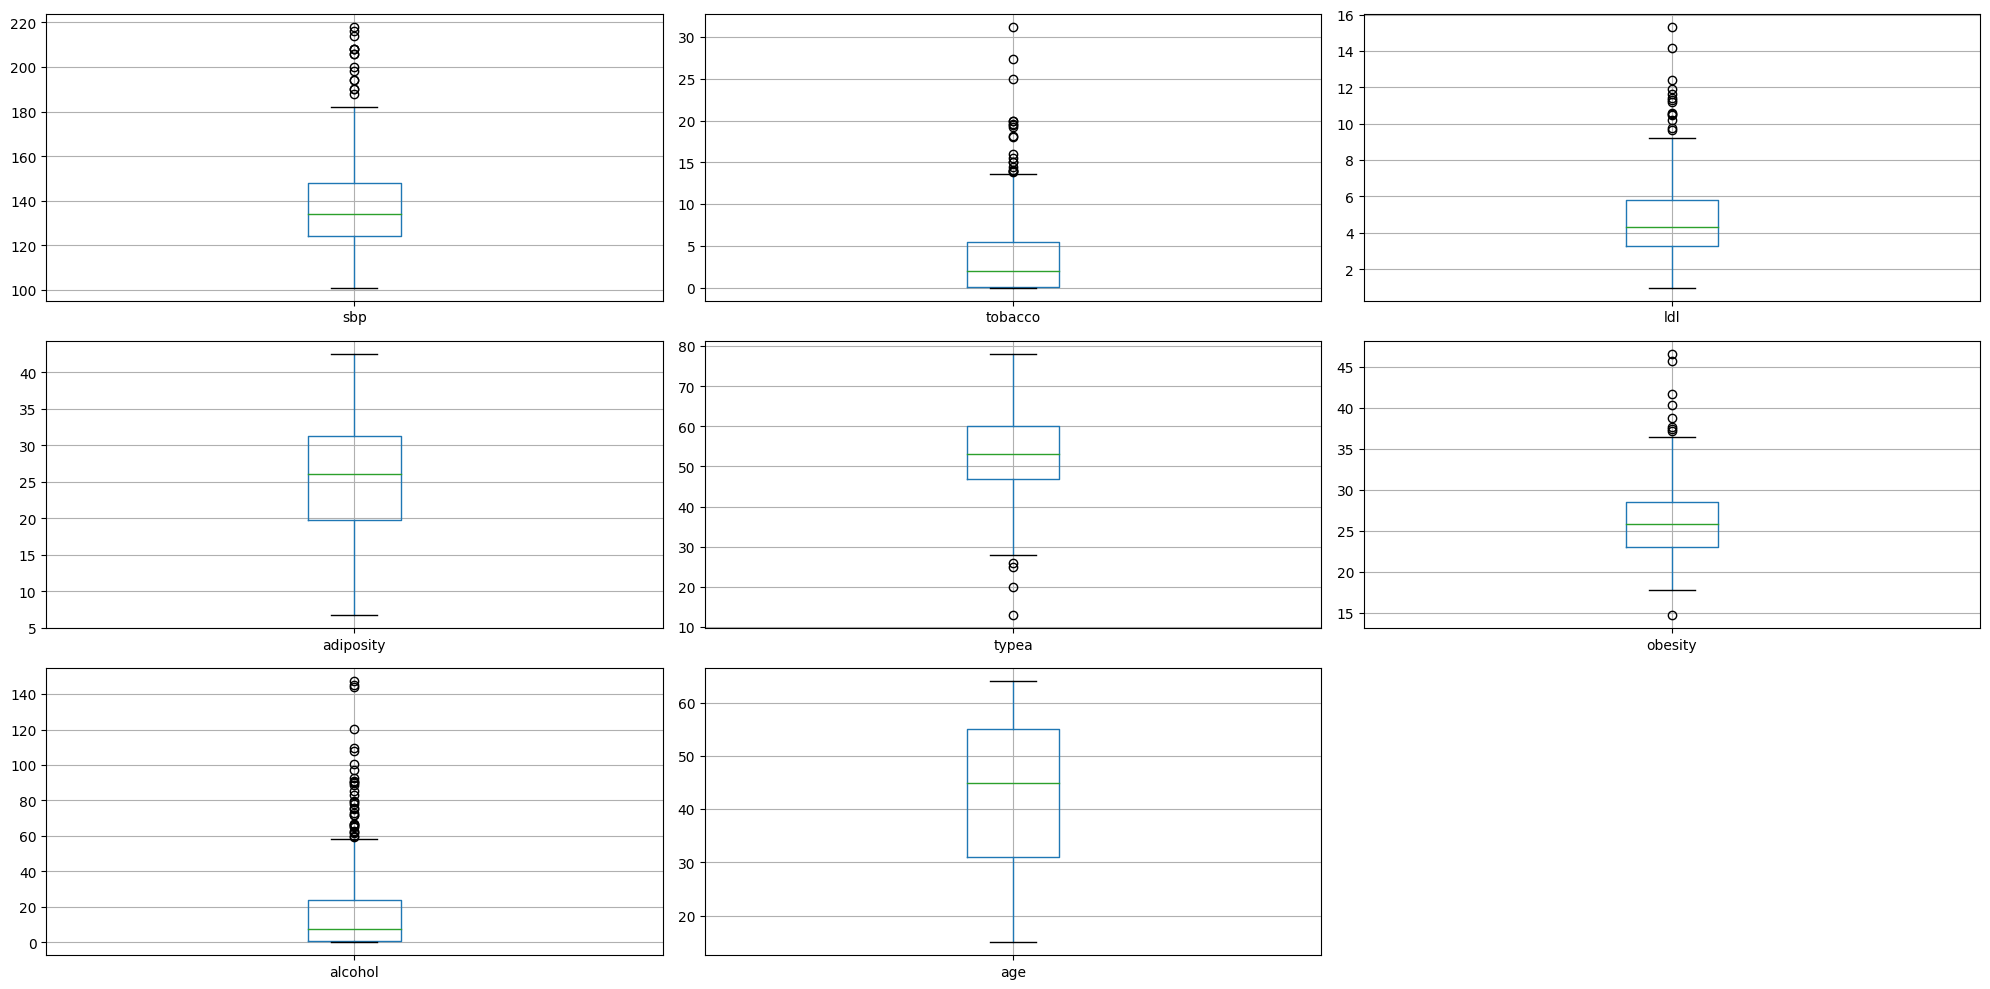

In [4]:
plt.figure(figsize=(20,10))

plt.subplot(3,3,1)
DS[['sbp']].boxplot()

plt.subplot(3,3,2)
DS[['tobacco']].boxplot()

plt.subplot(3,3,3)
DS[['ldl']].boxplot()

plt.subplot(3,3,4)
DS[['adiposity']].boxplot()

plt.subplot(3,3,5)
DS[['typea']].boxplot()

plt.subplot(3,3,6)
DS[['obesity']].boxplot()

plt.subplot(3,3,7)
DS[['alcohol']].boxplot()

plt.subplot(3,3,8)
DS[['age']].boxplot()

plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

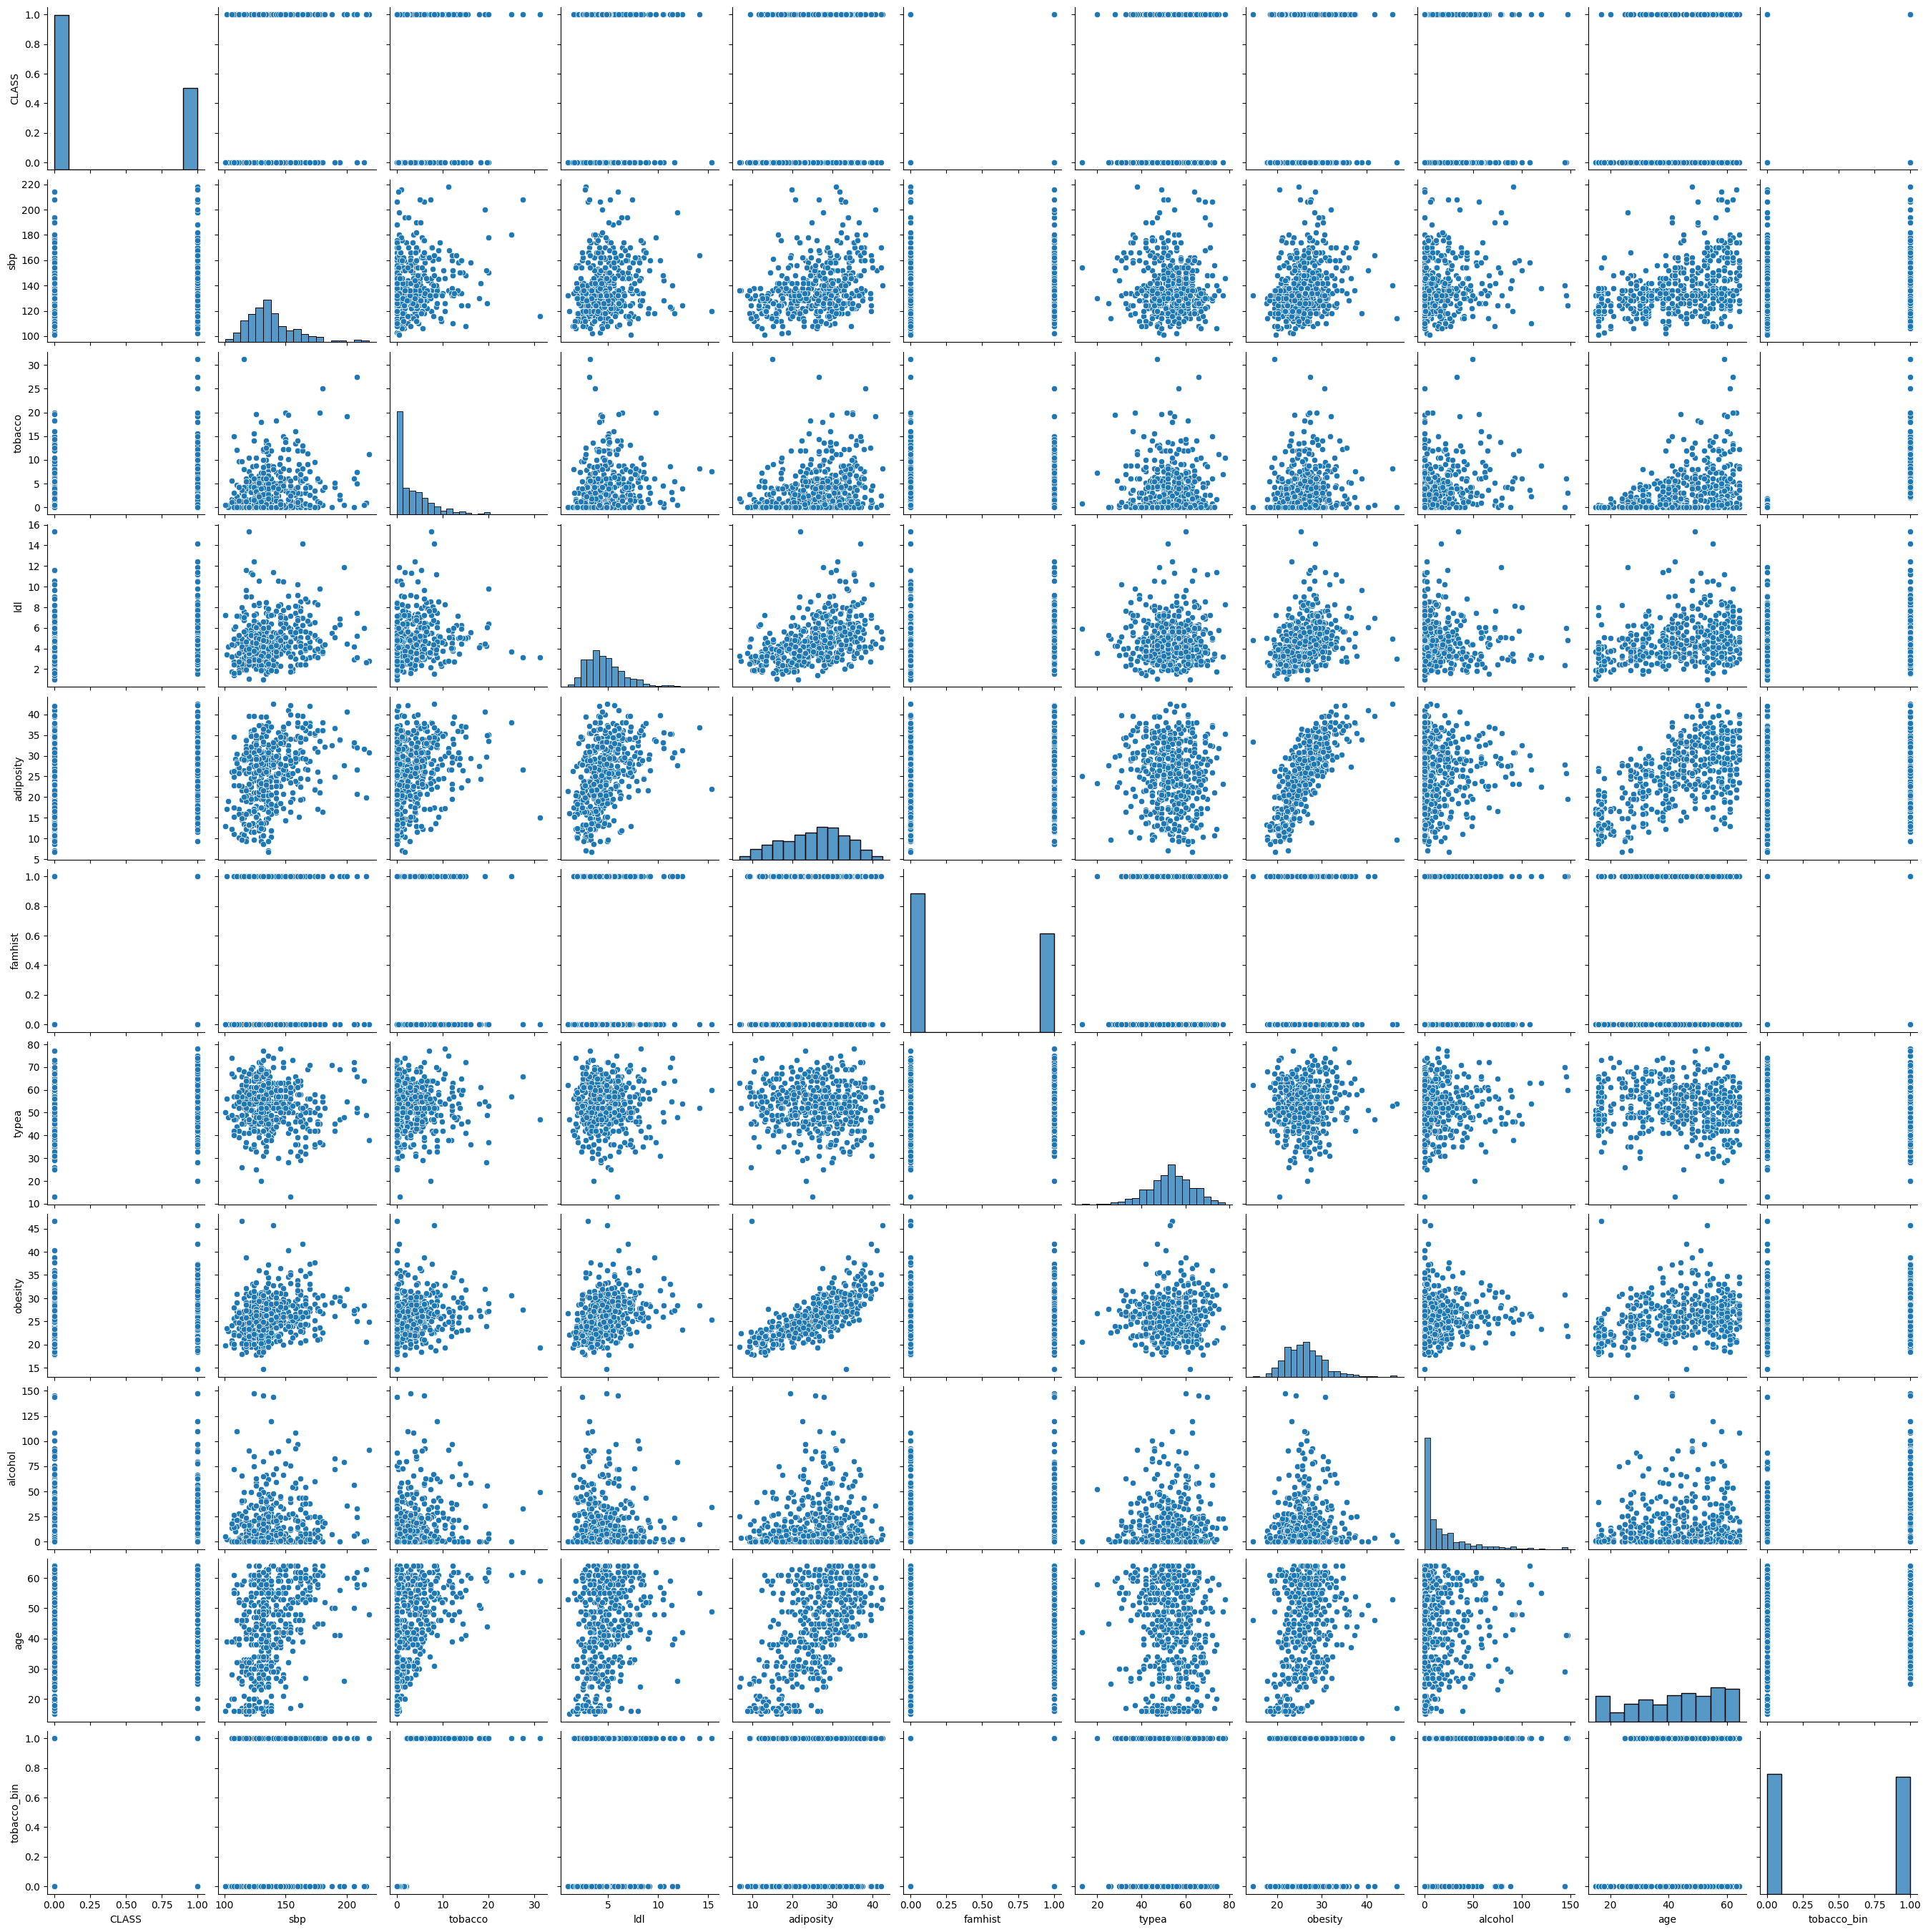

In [5]:
# When using the 'inline' backend, your matplotlib graphs will be included in your notebook, next to the code.
%matplotlib inline
# Interactivity
#%matplotlib notebook

# Plot data distribution and scatterplot matrix
#sns.set()  # seaborn's method to set its chart style
plt.figure()
sns.pairplot(DS, height=2.5)
plt.show()

<Figure size 640x480 with 0 Axes>

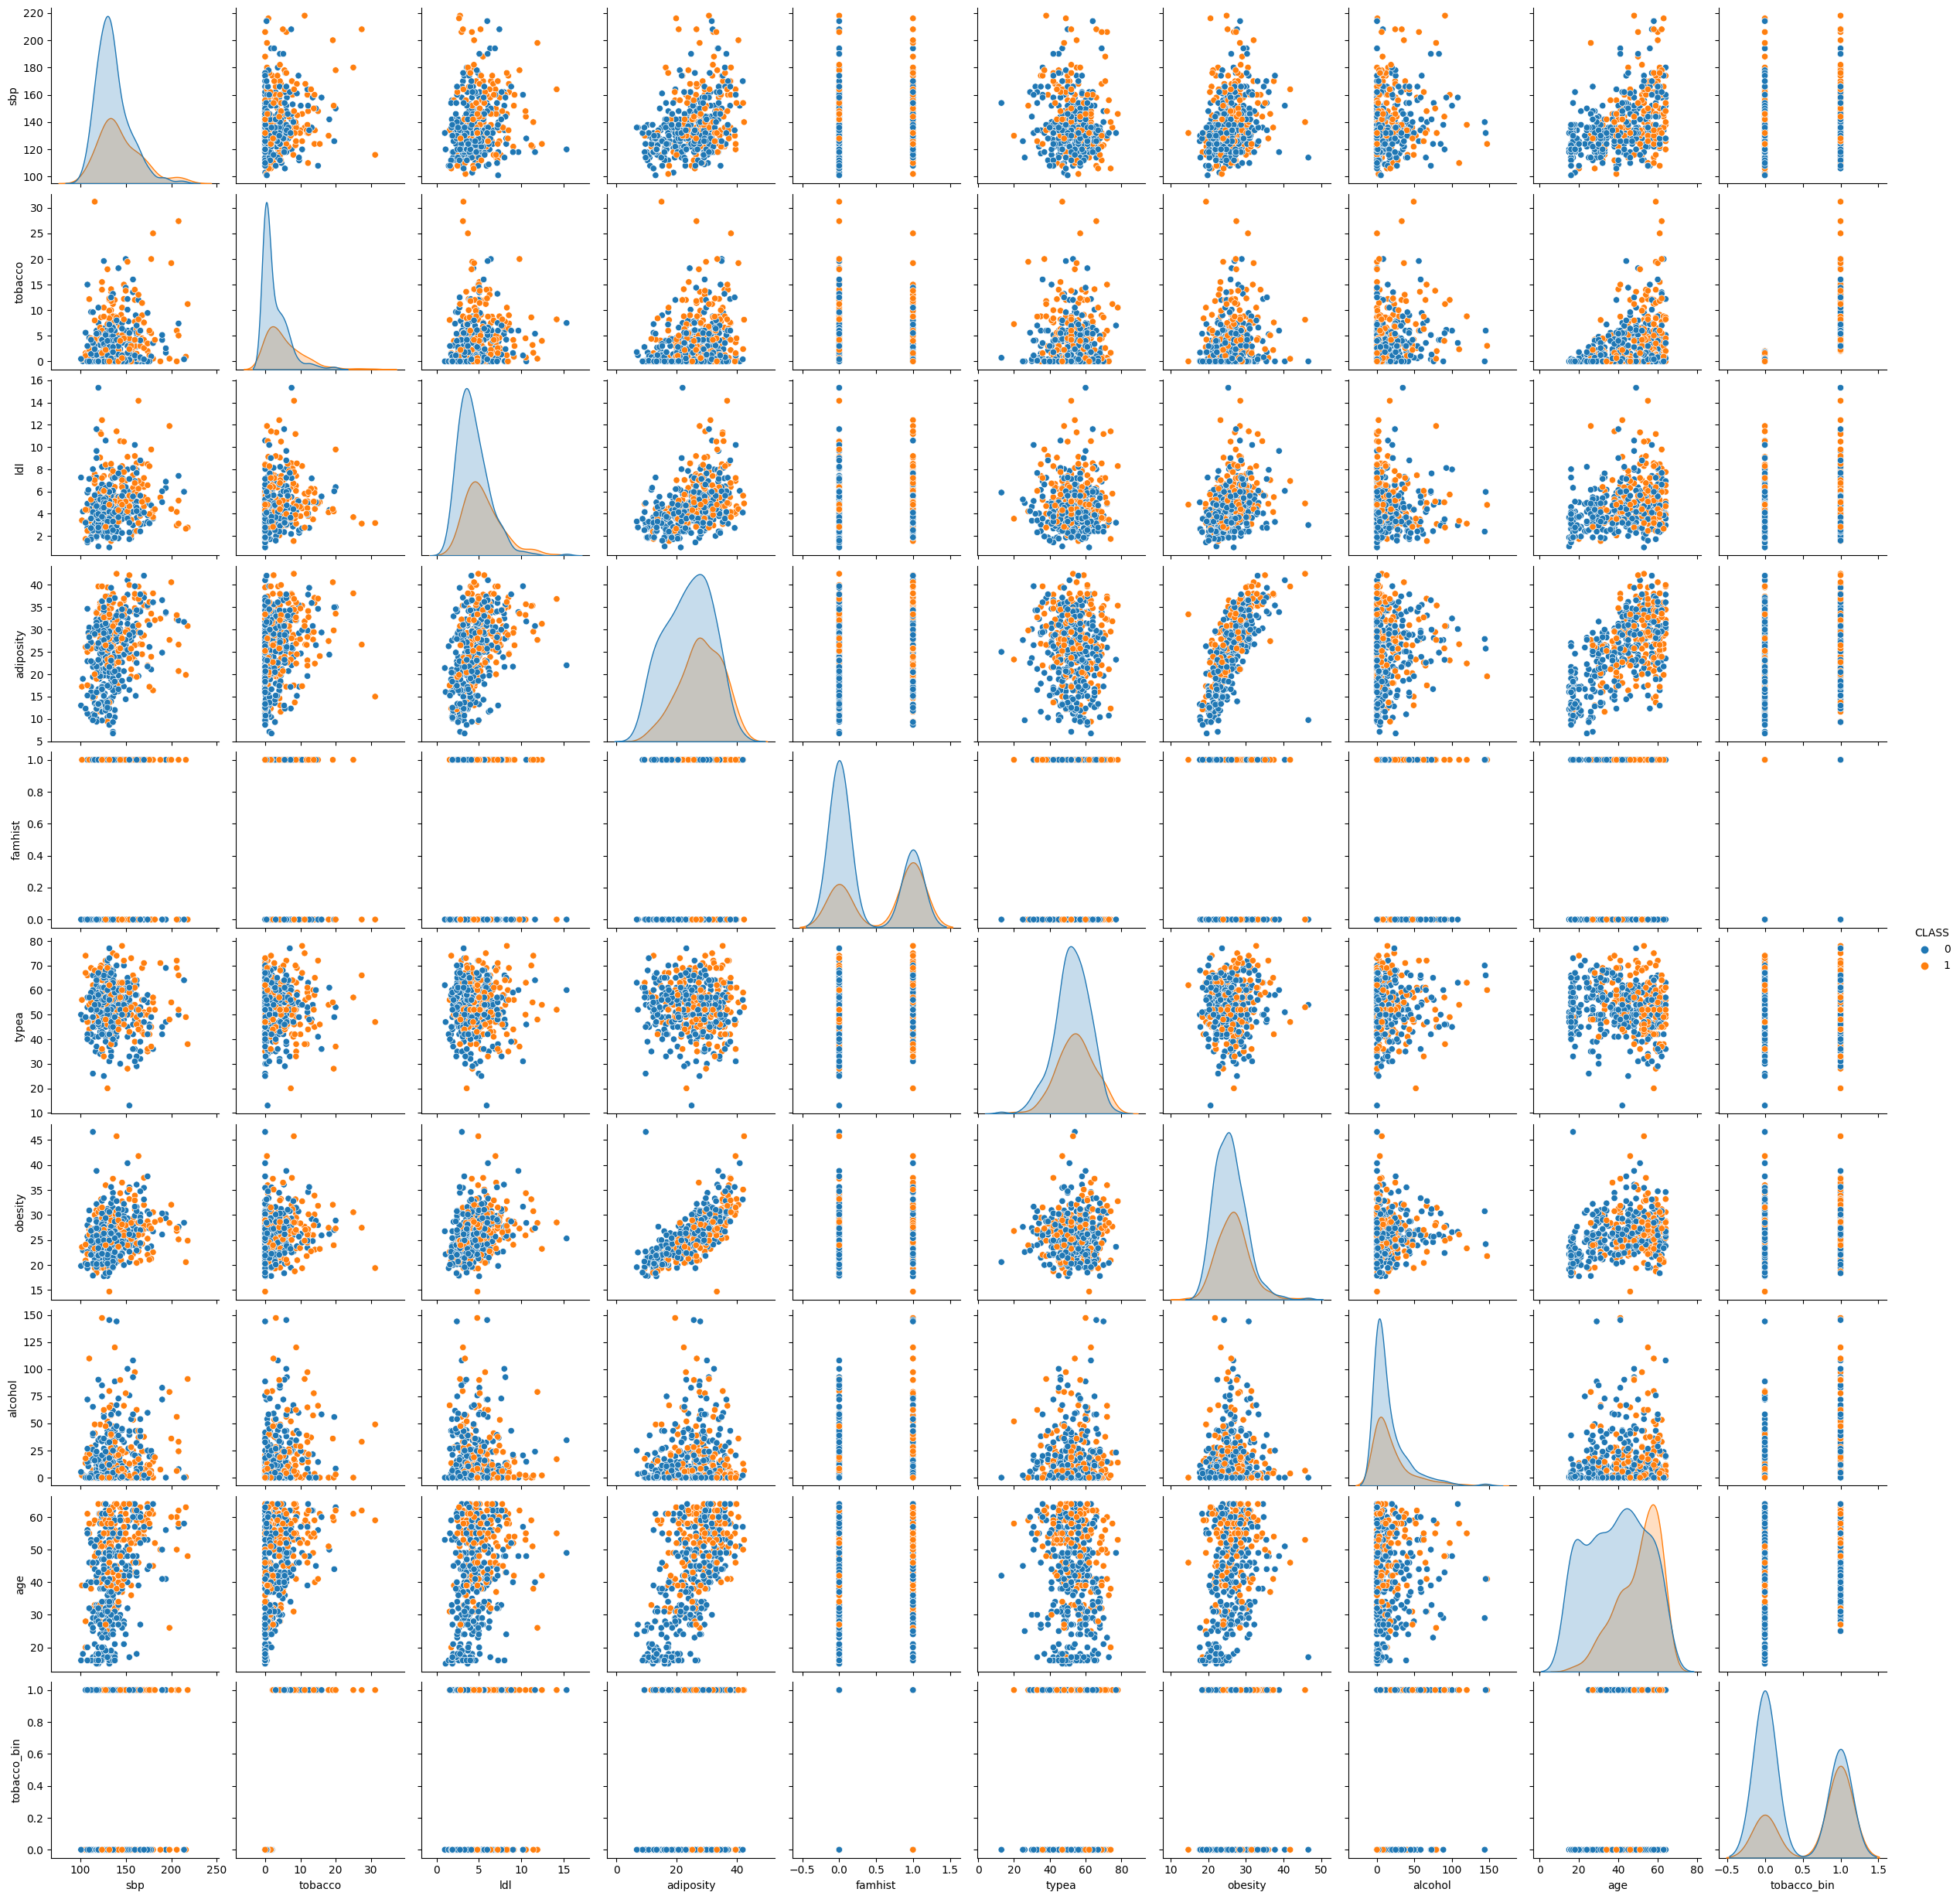

In [6]:
# Stratify by "CLASS" variable
plt.figure()
sns.pairplot(DS, hue='CLASS', height=2.5)
plt.show()


## Practizing with Linear Regression

                            OLS Regression Results                            
Dep. Variable:              adiposity   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     485.4
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           5.66e-74
Time:                        08:27:55   Log-Likelihood:                -1436.5
No. Observations:                 462   AIC:                             2877.
Df Residuals:                     460   BIC:                             2885.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.0534      1.584     -5.714      0.0

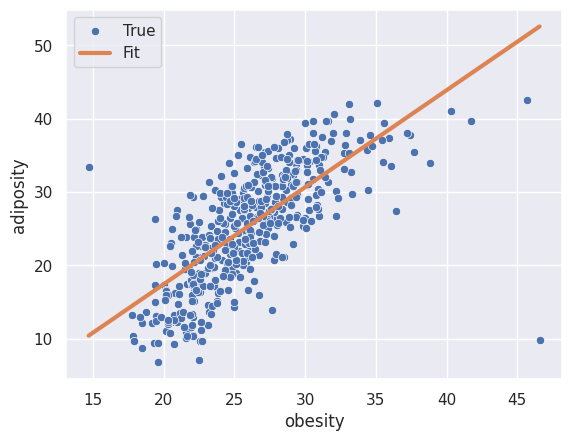

In [7]:
# Import libraries for statistical analyses
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

# Let's start by exploring the correlation with subject's obesity
# FIT OLS linear regression model
mod = smf.ols(formula='adiposity ~ 1 + obesity', data=DS)
res = mod.fit()
print(res.summary())

# Get the modelled values
DS['adiposity_pred_lin'] = res.predict(DS)

# Plot
sns.set()
sns.scatterplot(data=DS, x='obesity', y='adiposity', color=sns.color_palette()[0] ,label='True')
sns.lineplot(data=DS, x='obesity', y='adiposity_pred_lin', color=sns.color_palette()[1], label='Fit', linewidth=3)
plt.show()

# N.B: This is DESCRIPTIVE statistics because we are using all the data to fit the model and we are making the predictions on the same input data.

### Feature Transformation

                            OLS Regression Results                            
Dep. Variable:              adiposity   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     524.7
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           4.81e-78
Time:                        08:27:57   Log-Likelihood:                -1427.1
No. Observations:                 462   AIC:                             2858.
Df Residuals:                     460   BIC:                             2866.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -46.0537      3.130    -14.716

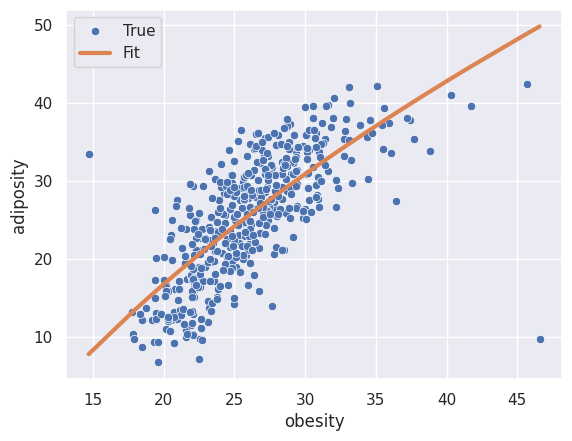

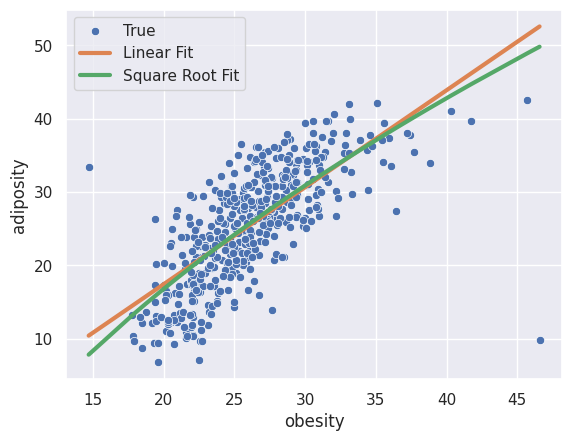

In [8]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

# Linear approximation might not be the most appropriate model. The relationship seems to be more like a square root
# Derive a new feaute as the sqrt of the original one
DS['obesity_sqrt2'] = np.sqrt(DS['obesity'])

# Fit the model
mod = smf.ols(formula='adiposity ~ 1 + obesity_sqrt2', data=DS)
res = mod.fit()
print(res.summary())

# Compute estimates
DS['adiposity_pred_sqrt'] = res.predict(DS)

# Plot
plt.figure()
sns.scatterplot(data=DS, x='obesity', y='adiposity', color=sns.color_palette()[0] ,label='True')
sns.lineplot(data=DS, x='obesity', y='adiposity_pred_sqrt', color=sns.color_palette()[1], label='Fit', linewidth=3)
plt.show()

# Compare the LINEAR model with the SQRT model
plt.figure()
sns.scatterplot(data=DS, x='obesity', y='adiposity', color=sns.color_palette()[0] ,label='True')
sns.lineplot(data=DS, x='obesity', y='adiposity_pred_lin', color=sns.color_palette()[1], label='Linear Fit', linewidth=3)
sns.lineplot(data=DS, x='obesity', y='adiposity_pred_sqrt', color=sns.color_palette()[2], label='Square Root Fit', linewidth=3)
plt.show()


# Notes:
# Greater R2 and Adj R2
# Lower AIC
# Lower Prob F-statistic
# Higher Log-Likelihood
# Better with SQRT


#### We can look at the fitted model in its own feature space (obesity_sqrt2 - adiposity space)



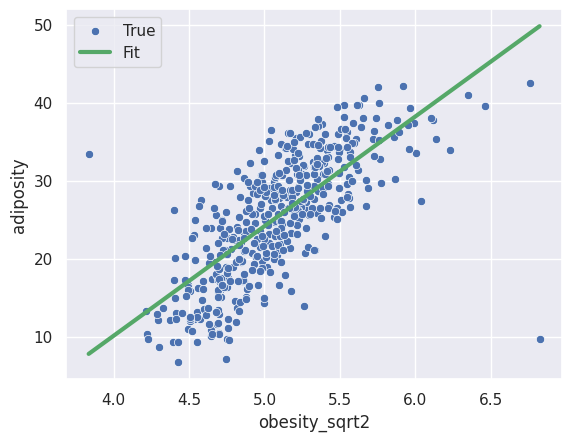

In [9]:
plt.figure()
sns.scatterplot(data=DS, x='obesity_sqrt2', y='adiposity', color=sns.color_palette()[0] ,label='True')
sns.lineplot(data=DS, x='obesity_sqrt2', y='adiposity_pred_sqrt', color=sns.color_palette()[2], label='Fit', linewidth=3)
plt.show()


#### It's Linear!
It turns out to be nothing but that a linear fit!
Indeed, this is exactly what we have fitted a linear model in the adiposity - obesity_sqrt2 space.

However, as previosuly observed, it is a non linear model (square root) in the original one (adiposity - relationship)


### Add Categorical Features

When a binary variable (0-1) is added to the model, we are implicitly defining two differentmodels:

tobacco = 0: adiposity = θ + α * obesity_sqrt2 => REFERENCE MODEL

tobacco = 1: adiposity = θ + α * obesity_sqrt2 + β * tobacco

which can be rearranged:

tobacco = 1: adiposity = (θ+β) + α * obesity_sqrt2

so, we are simply shifting the model's intercept

False    234
True     228
Name: tobacco_bin, dtype: int64
                            OLS Regression Results                            
Dep. Variable:              adiposity   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     307.8
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           1.65e-85
Time:                        08:28:05   Log-Likelihood:                -1406.4
No. Observations:                 462   AIC:                             2819.
Df Residuals:                     459   BIC:                             2831.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

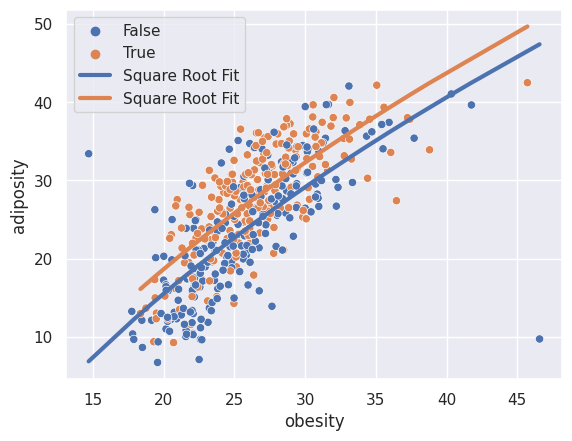

In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from matplotlib import cm

# Add categorical information
DS['tobacco_bin'] = DS['tobacco_bin']==1
print(DS['tobacco_bin'].value_counts())
mod = smf.ols(formula='adiposity ~ 1 + obesity_sqrt2 + tobacco_bin', data=DS)
res = mod.fit()
print(res.summary())

DS['adiposity_pred_sqrt'] = res.predict(DS)

# Compare the LINEAR model with the SQRT model
plt.figure()
sns.scatterplot(data=DS, x='obesity', y='adiposity', color=sns.color_palette() , hue='tobacco_bin')
sns.lineplot(data=DS[DS['tobacco_bin']==0], x='obesity', y='adiposity_pred_sqrt', color=sns.color_palette()[0], label='Square Root Fit', linewidth=3)
sns.lineplot(data=DS[DS['tobacco_bin']==1], x='obesity', y='adiposity_pred_sqrt', color=sns.color_palette()[1], label='Square Root Fit', linewidth=3)
plt.show()


In [11]:
DS['tobacco_bin'].value_counts()

False    234
True     228
Name: tobacco_bin, dtype: int64

### Explore Interaction Effects

What if we would like to vary also the slope of our model according to a binary variable?

This can be done with interaction effects.

There are two possible approaches:

1.   adiposity = θ + φ * obesity_sqrt2*tobacco
2.   adiposity = θ + α * obesity_sqrt2 + β * tobacco + φ * obesity_sqrt2 * tobacco

In case 1 we simply create a new variable as the interaction (product) between the two. However, we are not able to separate the amount of variability explained from the interaction w.r.t the one explained by the original variables alone.
Case 2 accounts for this last problem by creating a model that can be rearranged as:

*   tobacco = 1: adiposity = (θ + β) + (α + φ) * obesity_sqrt2

so, we will shift both the model's intercept and its slope



                            OLS Regression Results                            
Dep. Variable:              adiposity   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     307.9
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           1.60e-85
Time:                        08:28:08   Log-Likelihood:                -1406.4
No. Observations:                 462   AIC:                             2819.
Df Residuals:                     459   BIC:                             2831.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

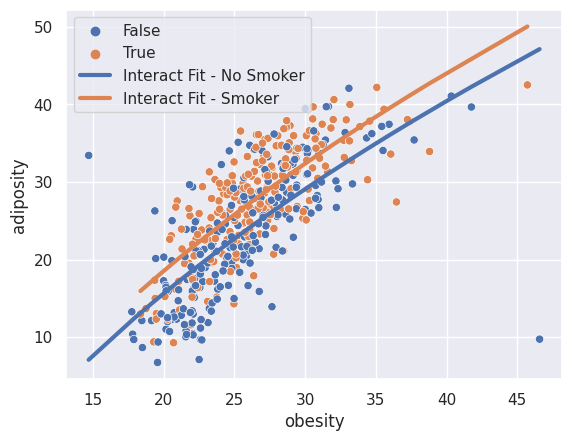

In [12]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from matplotlib import cm

# Add categorical information - CASE 1
mod = smf.ols(formula='adiposity ~ 1 + obesity_sqrt2:tobacco_bin', data=DS)
res = mod.fit()
print(res.summary())

# The interaction seems to be significant. However,
# We need to add all the baseline terms to assess if that's true

# Add categorical information - CASE 2
mod = smf.ols(formula='adiposity ~ 1 + obesity_sqrt2*tobacco_bin', data=DS)
res = mod.fit()
print(res.summary())

DS['adiposity_pred_interact'] = res.predict(DS)

# Compare the LINEAR model with the SQRT model
plt.figure()
sns.scatterplot(data=DS, x='obesity', y='adiposity', color=sns.color_palette() , hue='tobacco_bin')
sns.lineplot(data=DS[DS['tobacco_bin']==0], x='obesity', y='adiposity_pred_interact', color=sns.color_palette()[0], label='Interact Fit - No Smoker', linewidth=3)
sns.lineplot(data=DS[DS['tobacco_bin']==1], x='obesity', y='adiposity_pred_interact', color=sns.color_palette()[1], label='Interact Fit - Smoker', linewidth=3)
plt.show()

# Obesity is still significant, tobacco and interaction term are not, therefore
# we can conclude that the interaction has no effect on adiposity.
# So we can stick with: 'adiposity ~ 1 + obesity + tobacco_bin'

## Remember the REFERENCE MODEL:
Implicitly, we are defining two models:
- tobacco = 0:  adiposity = θ + α * obesity_sqrt2 => **REFERENCE MODEL**
- tobacco = 1: adiposity = θ + α * obesity_sqrt2 + β * tobacco + δ * obesity_sqrt2 * tobacco

### Add Continuous Variable

In [ ]:
# Give permissions to isntall third-party software
from google.colab import output
output.enable_custom_widget_manager()
!pip install ipympl

                            OLS Regression Results                            
Dep. Variable:              adiposity   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     569.9
Date:                Mon, 30 Oct 2023   Prob (F-statistic):          4.17e-125
Time:                        08:44:34   Log-Likelihood:                -1314.6
No. Observations:                 462   AIC:                             2635.
Df Residuals:                     459   BIC:                             2648.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -42.9698      2.463    -17.448

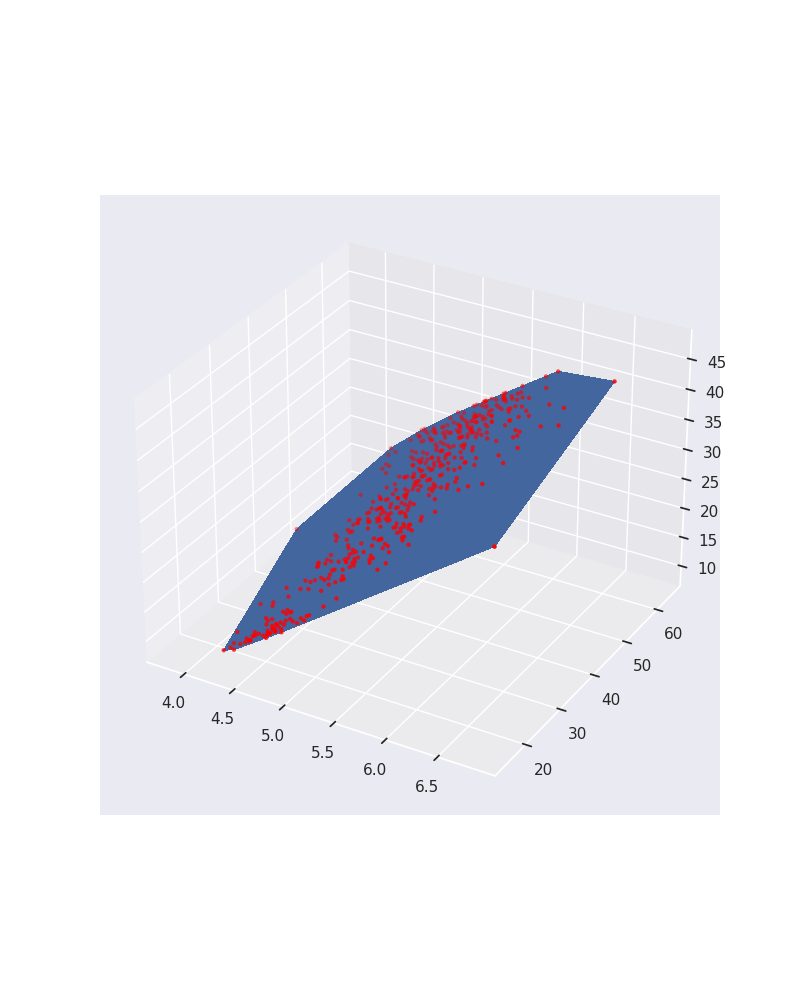

In [45]:

#%matplotlib inline
%matplotlib widget

import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from matplotlib import cm

# Add categorical information - CASE 1
mod = smf.ols(formula='adiposity ~ 1 + obesity_sqrt2 + age', data=DS)
res = mod.fit()
print(res.summary())

DS['adiposity_pred_age'] = res.predict(DS)
X, Y = np.meshgrid(DS['obesity_sqrt2'], DS['age'])
# plot the surface
#fig = plt.figure()
fig, ax3 = plt.subplots(subplot_kw={"projection": "3d"},figsize=(8,10))
#plt3d = fig.add_subplot(projection='3d')
ax3.plot_trisurf(DS['obesity_sqrt2'], DS['age'], DS['adiposity_pred_age'], color=sns.color_palette()[0], linewidth=0, antialiased=False)
# Ensure that the next plot doesn't overwrite the first plot
ax = plt.gca()
#ax.hold(True)

ax.scatter(DS['obesity_sqrt2'], DS['age'], DS['adiposity_pred_age'], color='red',marker='.')
plt.show()

In [55]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from matplotlib import cm

# Add categorical information - CASE 1
mod = smf.ols(formula='adiposity ~ 1 + obesity_sqrt2 + age + sbp + typea + tobacco', data=DS)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              adiposity   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     230.1
Date:                Mon, 30 Oct 2023   Prob (F-statistic):          3.11e-122
Time:                        08:56:28   Log-Likelihood:                -1312.0
No. Observations:                 462   AIC:                             2636.
Df Residuals:                     456   BIC:                             2661.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -42.9439      2.754    -15.596

CLASS       sbp   tobacco       ldl  adiposity  \
CLASS                    1.000000  0.192354  0.299718  0.263053   0.254121   
sbp                      0.192354  1.000000  0.212247  0.158296   0.356500   
tobacco                  0.299718  0.212247  1.000000  0.158905   0.286640   
ldl                      0.263053  0.158296  0.158905  1.000000   0.440432   
adiposity                0.254121  0.356500  0.286640  0.440432   1.000000   
famhist                  0.272373  0.085645  0.088601  0.161353   0.181721   
typea                    0.103156 -0.057454 -0.014608  0.044048  -0.043144   
obesity                  0.100095  0.238067  0.124529  0.330506   0.716556   
alcohol                  0.062531  0.140096  0.200813 -0.033403   0.100330   
age                      0.372973  0.388771  0.450330  0.311799   0.625954   
tobacco_bin              0.273330  0.191469  0.699865  0.206052   0.292565   
adiposity_pred_lin       0.100095  0.238067  0.124529  0.330506   0.716556   
obesity_sqrt2            0.100037  0.244546  0.130090  0.339707   0.729964   
adiposity_pred_sqrt      0.165884  0.278468  0.307510  0.370859   0.756874   
adiposity_pred_interact  0.165156  0.277908  0.307938  0.370592   0.756936   
adiposity_pred_age       0.267192  0.377312  0.329164  0.403742   0.844332   

                          famhist     typea   obesity   alcohol       age  \
CLASS                    0.272373  0.103156  0.100095  0.062531  0.372973   
sbp                      0.085645 -0.057454  0.238067  0.140096  0.388771   
tobacco                  0.088601 -0.014608  0.124529  0.200813  0.450330   
ldl                      0.161353  0.044048  0.330506 -0.033403  0.311799   
adiposity                0.181721 -0.043144  0.716556  0.100330  0.625954   
famhist                  1.000000  0.044809  0.115595  0.080520  0.239667   
typea                    0.044809  1.000000  0.074006  0.039498 -0.102606   
obesity                  0.115595  0.074006  1.000000  0.051620  0.291777   
alcohol                  0.080520  0.039498  0.051620  1.000000  0.101125   
age                      0.239667 -0.102606  0.291777  0.101125  1.000000   
tobacco_bin              0.169080 -0.003394  0.121836  0.246542  0.451519   
adiposity_pred_lin       0.115595  0.074006  1.000000  0.051620  0.291777   
obesity_sqrt2            0.118574  0.070501  0.997836  0.061263  0.303673   
adiposity_pred_sqrt      0.155341  0.064664  0.960507  0.122683  0.402765   
adiposity_pred_interact  0.154850  0.064969  0.960509  0.121233  0.400837   
adiposity_pred_age       0.209935 -0.004463  0.856747  0.096491  0.741361   

                         tobacco_bin  adiposity_pred_lin  obesity_sqrt2  \
CLASS                       0.273330            0.100095       0.100037   
sbp                         0.191469            0.238067       0.244546   
tobacco                     0.699865            0.124529       0.130090   
ldl                         0.206052            0.330506       0.339707   
adiposity                   0.292565            0.716556       0.729964   
famhist                     0.169080            0.115595       0.118574   
typea                      -0.003394            0.074006       0.070501   
obesity                     0.121836            1.000000       0.997836   
alcohol                     0.246542            0.051620       0.061263   
age                         0.451519            0.291777       0.303673   
tobacco_bin                 1.000000            0.121836       0.129063   
adiposity_pred_lin          0.121836            1.000000       0.997836   
obesity_sqrt2               0.129063            0.997836       1.000000   
adiposity_pred_sqrt         0.386544            0.960507       0.964446   
adiposity_pred_interact     0.386512            0.960509       0.964367   
adiposity_pred_age          0.329068            0.856747       0.864546   

                         adiposity_pred_sqrt  adiposity_pred_interact  \
CLASS                               0.1658

<Axes: >

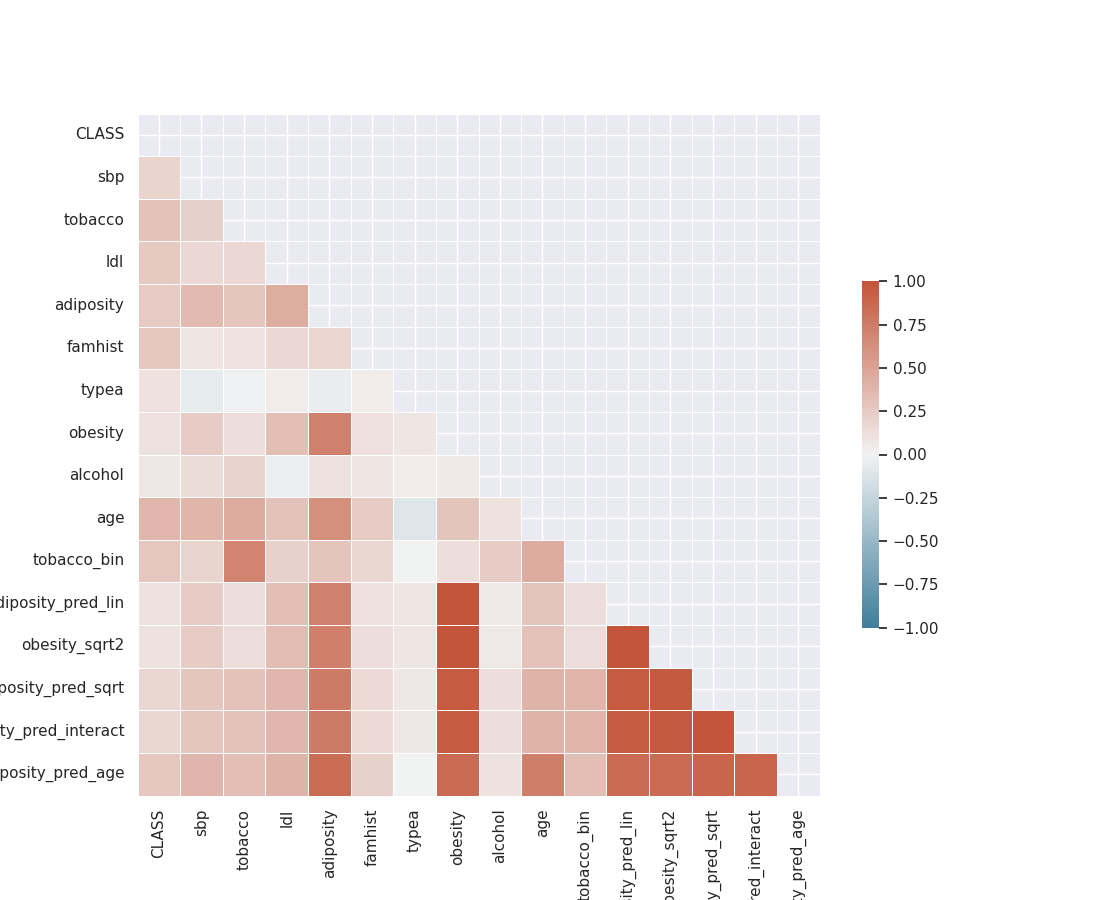

In [50]:
# Compute the correlation matrix
corr = DS.corr()
display(corr)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [ ]:
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# import numpy as np

# # Is the model driven only by a SQRT relationship? Let's add both contributions and see the statistics

# # Derive a new feaute as the sqrt of the original one
# DS['obesity_sqrt2'] = np.sqrt(DS['obesity'])

# # Fit the model
# mod = smf.ols(formula='adiposity ~ 1 + obesity + obesity_sqrt2', data=DS)
# res = mod.fit()
# print(res.summary())

# # Compute estimates
# DS['adiposity_pred_both'] = res.predict(DS)

# # Plot
# plt.figure()
# sns.scatterplot(data=DS, x='obesity', y='adiposity', color=sns.color_palette()[0] ,label='True')
# sns.lineplot(data=DS, x='obesity', y='adiposity_pred_lin', color=sns.color_palette()[1], label='Fit LIN', linewidth=3)
# sns.lineplot(data=DS, x='obesity', y='adiposity_pred_sqrt', color=sns.color_palette()[2], label='Fit SQRT', linewidth=3)
# sns.lineplot(data=DS, x='obesity', y='adiposity_pred_both', color=sns.color_palette()[3], label='Fit BOTH', linewidth=3)

# plt.show()

# # Remember to always include the original feature to really decouple the effects


In [ ]:
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# import numpy as np

# # Is the model driven only by a SQRT relationship? Let's add both contributions and see the statistics

# # Derive a new feaute as the sqrt of the original one
# DS['obesity_sqrt2'] = np.sqrt(DS['obesity'])

# # Fit the model
# mod = smf.ols(formula='adiposity ~ 1 + obesity + obesity_sqrt2', data=DS)
# res = mod.fit()
# print(res.summary())

# # Compute estimates
# DS['adiposity_pred_both'] = res.predict(DS)

# # Plot
# plt.figure()
# sns.scatterplot(data=DS, x='obesity', y='adiposity', color=sns.color_palette()[0] ,label='True')
# sns.lineplot(data=DS, x='obesity', y='adiposity_pred_lin', color=sns.color_palette()[1], label='Fit LIN', linewidth=3)
# sns.lineplot(data=DS, x='obesity', y='adiposity_pred_sqrt', color=sns.color_palette()[2], label='Fit SQRT', linewidth=3)
# sns.lineplot(data=DS, x='obesity', y='adiposity_pred_both', color=sns.color_palette()[3], label='Fit BOTH', linewidth=3)

# plt.show()

# # Remember to always include the original feature to really decouple the effects


In [ ]:
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# import numpy as np

# DS['adiposity_2']=DS['adiposity']**2
# mod = smf.ols(formula='obesity ~ 1 + adiposity + adiposity_2 + age', data=DS)
# res = mod.fit()
# print(res.summary())

# DS['obesity_pred_2'] = res.predict(DS)


# plt.figure()
# sns.scatterplot(data=DS, x='adiposity', y='obesity', color=sns.color_palette()[0] ,label='True')
# sns.lineplot(data=DS, x='adiposity', y='obesity_pred_2', color=sns.color_palette()[1], label='Fit')
# plt.show()



In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

mod = smf.ols(formula='adiposity ~ 1 + obesity + tobacco', data=DS)
res = mod.fit()
print(res.summary())



# DS['obesity_pred_2'] = res.predict(DS)
# plt.figure()
# sns.scatterplot(data=DS, x='adiposity', y='obesity', color=sns.color_palette()[0] ,label='True')
# sns.lineplot(data=DS, x='adiposity', y='obesity_pred_2', color=sns.color_palette()[1], label='Fit')
# plt.show()



                            OLS Regression Results                            
Dep. Variable:              adiposity   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     284.0
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           5.46e-81
Time:                        14:47:37   Log-Likelihood:                -1416.9
No. Observations:                 462   AIC:                             2840.
Df Residuals:                     459   BIC:                             2852.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.0875      1.520     -5.978      0.0

In [ ]:

mod = smf.ols(formula='tobacco ~ 1 + obesity + age', data=DS)
res = mod.fit()
print(res.summary())

mod = smf.ols(formula='obesity ~ 1 + adiposity + age', data=DS)
res = mod.fit()
print(res.summary())

df = pd.DataFrame(columns={'adiposity','age'})
DS['obesity_pred_adip_age'] = res.predict(DS)


mod = smf.ols(formula='tobacco ~ 1 + obesity + age + tobacco', data=DS)
res = mod.fit()
print(res.summary())



import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(DS['age'],DS['adiposity'],DS['obesity'])
ax.plot_trisurf(DS['age'],DS['adiposity'],DS['obesity_pred_adip_age'],cmap=cm.coolwarm)

In [ ]:
df = pd.DataFrame(columns=['adiposity','age'])
ddf = pd.DataFrame()
for i in range(round(min(DS['adiposity'])),round(max(DS['adiposity']))):
  lst = np.arange(min(DS['age']),max(DS['age']))
  ddf['age'] = lst
  ddf['adiposity'] = i
  #display(ddf)
  df = pd.concat([df,ddf])
display(df)

# Fit Model
mod = smf.ols(formula='obesity ~ 1 + adiposity + age', data=DS)
res = mod.fit()
print(res.summary())
# Predict observations
df['obesity_pred_adip_age'] = res.predict(df)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(DS['age'],DS['adiposity'],DS['obesity'])
ax.plot_trisurf(df['age'],df['adiposity'],df['obesity_pred_adip_age'],cmap=cm.coolwarm)


adiposity age
0          7  15
1          7  16
2          7  17
3          7  18
4          7  19
..       ...  ..
44        41  59
45        41  60
46        41  61
47        41  62
48        41  63

[1715 rows x 2 columns]

                            OLS Regression Results                            
Dep. Variable:                obesity   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     284.9
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           3.59e-81
Time:                        09:59:46   Log-Likelihood:                -1133.1
No. Observations:                 462   AIC:                             2272.
Df Residuals:                     459   BIC:                             2285.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.1481      0.473     36.268      0.0

AttributeError: ignored

In [ ]:
df

adiposity age
0          7  15
1          7  16
2          7  17
3          7  18
4          7  19
..       ...  ..
44        41  59
45        41  60
46        41  61
47        41  62
48        41  63

[1715 rows x 2 columns]

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

mod = smf.ols(formula='obesity ~ 1 + adiposity + adiposity*age', data=DS)
res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:                obesity   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     189.8
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           5.78e-80
Time:                        09:39:05   Log-Likelihood:                -1132.9
No. Observations:                 462   AIC:                             2274.
Df Residuals:                     458   BIC:                             2290.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        17.7974      1.211     14.693